## 0. Install and Import Dependencies

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils


## 1. Read in Image, Grayscale and Blur

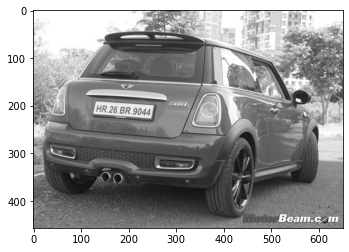

In [18]:
img = cv2.imread('image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
#cv2.imshow('K',gray)
#cv2.waitKey()
cv2.destroyAllWindows()

## 2. Apply filter and find edges for localization

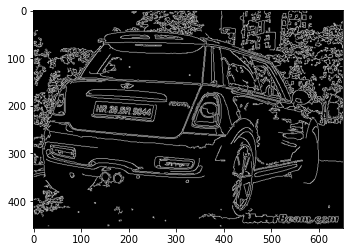

In [19]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection threshold1,2
#cv2.imshow('SS',edged)
#cv2.waitKey()
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [20]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Mode& Method
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] # acending order

In [21]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [22]:
location

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [23]:
mask = np.zeros(gray.shape, np.uint8)
# plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

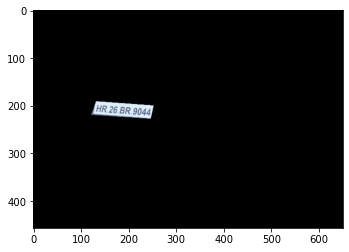

In [24]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [26]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

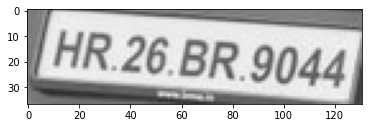

In [27]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [48]:
# !pip3 install pytesseract

## 4. Use Pytesseract To Read Text

In [28]:
import pytesseract 
pytesseract.pytesseract.tesseract_cmd=r'C:/Program Files/Tesseract-OCR/tesseract.exe'
text = pytesseract.image_to_string(cropped_image, lang='eng')
result=text
print("Detected Text : ",text)

Detected Text :  [HR 26.BR 9044,

